In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
#アナコンダプロンプトへpip install mglearnを入力して取得。

%matplotlib inline

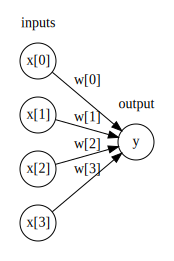

In [8]:
#線形回帰のグラフィックモデル
#y^=w[0]*x[0]+w[1]*x[1]+...
mglearn.plots.plot_logistic_regression_graph()

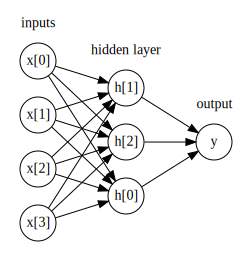

In [7]:
#ニューラルネットワークのグラフィックモデル
#y^とh[i]の間の重みをv[i]とすると、　ｙ＾＝h[0]*v[0]+h[1]*v[1]+...
mglearn.plots.plot_single_hidden_layer_graph()

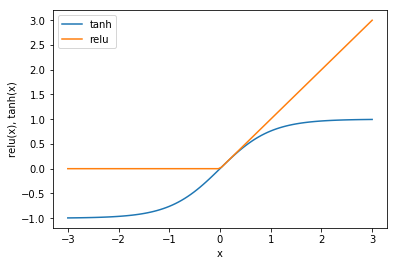

In [9]:
#隠れユニットh[i]を導くために使用される非線形関数
#tanhの場合　h[i]=tanh(w[0,i]*x[0]+w[1,i]*x[1]+...w[3,i]*x[3]+b[i])

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
#tanh 双曲正接関数。小さい値は-1,大きい値は+1に
#relu 正規化線形関数。0以下の値は切り捨てて0に
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

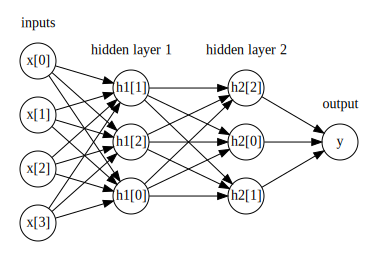

In [10]:
#２層のニューラルネットワークのグラフィカルモデル
mglearn.plots.plot_two_hidden_layer_graph()

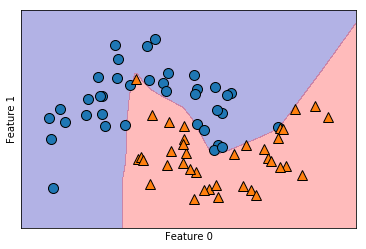

In [12]:
#p106 sklearnでのニューラルネットワークでのパターン認識

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
#stratify 分割する割合を決定している？
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
#MLPClassifier(hidden_layer_sizes=～)で隠れ層ユニットの数を設定。デフォルトで100。
#また非線形関数はデフォルトでrelu
#lbdgs,adam,sgdなどニューラルネットワークのモデルの種類
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

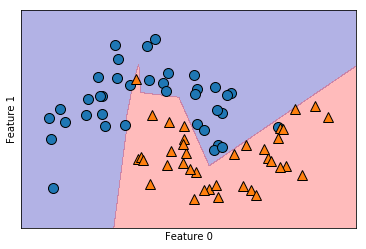

In [13]:
#p107 隠れ層ユニットの数を10に設定

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

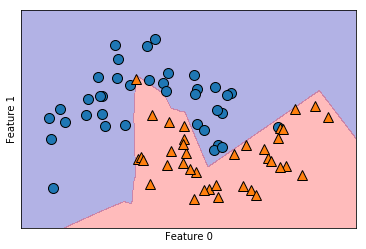

In [14]:
#隠れ層の数を2にする

mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
#隠れ層のユニット数を10,層の数を2と設定
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

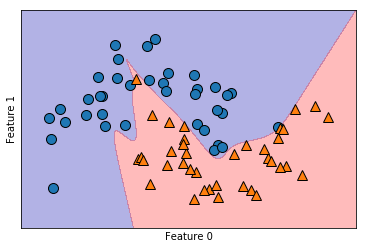

In [15]:
#非線形関数にtanhを用いる

mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

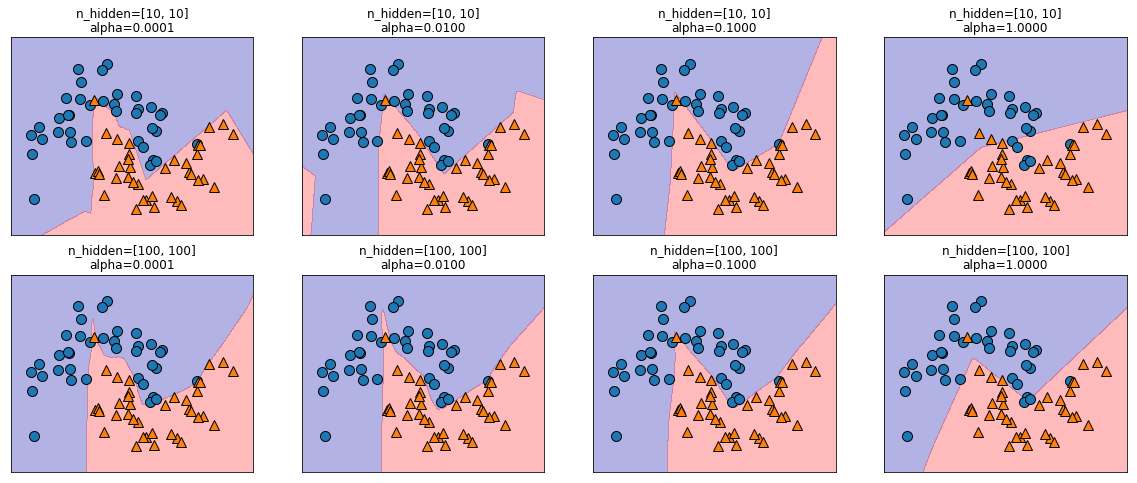

In [16]:
#隠れ層ユニットの数と正則化パラメータの変更と比較

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
#L2正則化のパラメータalphaを変更
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

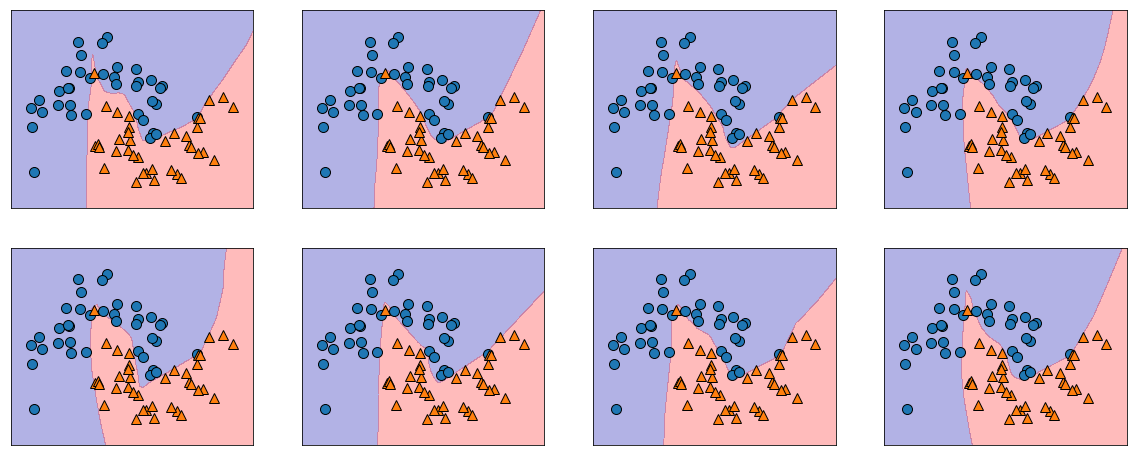

In [17]:
#乱数シードを変えると全く違う結果が出る

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
#分布的にrandom_state=iが分からない
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))
#cancerデータの各特徴量の最大値

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [22]:
#SVMと同様にデータスケールが問題であり、平均0分散1にする

mean_on_train = X_train.mean(axis=0)
#mean 平均値を算出
std_on_train = X_train.std(axis=0)
#std 標準偏差を算出

X_train_scaled = (X_train - mean_on_train) / std_on_train
#mean=0,std=1になるらしい
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [23]:
#p112 繰り返し回数を増やす
#上述のMaximum iterations reached and the optimization hasn't converged yetへ対策

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
#max_iter 繰り返し回数を変更できる

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [24]:
#訓練性能とテスト性能に差がある→過学習。モデルの複雑さを下げて汎化性能を上げる（大多数に当てはまるようにする）

#alphaを0.0001から1へ
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


上がらない・・・　※このアプローチ方法がどのモデルでも一般的にベストの性能が出るらしい

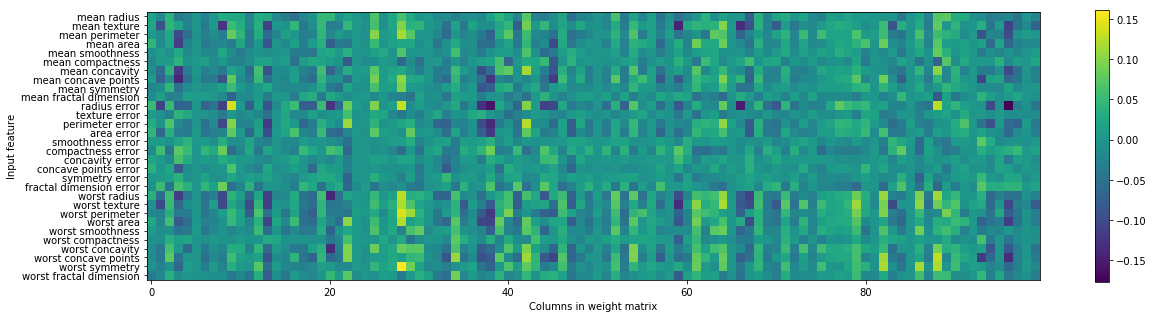

In [27]:
#重みの数値を解析する方法
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0],interpolation='none',  cmap='viridis')
#interpolation 改ざん？どういう意味？
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

すべての隠れユニットに対して重みが少ないものは重要ではない。例えばerroe系は比較的重みが小さい。

mlpはニューラルネットワークで可能な範囲が少ないので他のディープラーニングを試すといいらしい